<a href="https://colab.research.google.com/github/Rajshree-Th/Logistic-regression/blob/main/My_Logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement Logistic Regression from scratch

In this session, we will implement Logistic Regression with L1 regularization from scratch and predict the labels of the test data. We will then verify the correctness of the our implementation using multiple "grader" functions/cells. The grader functions would help us to validate the correctness of our code.

Let's know a brief about Logistic regression. Logistic regression is a statistical method used to model the relationship between a binary dependent variable (a variable that can take only two values, such as "yes" or "no") and one or more independent variables. The goal of logistic regression is to predict the probability of the dependent variable taking one of the two possible values based on the values of the independent variables.

It is a popular and powerful method for modeling the probability of binary outcomes based on one or more independent variables. It is widely used in various fields such as finance, healthcare, marketing, and social sciences.

The foremost task is to get data. I already have the CSV data file is in my google drive. So to directly get access our data file stored in google drive into our google colab notebook we need to mount Google Drive. Once mounted, the we can navigate to the "/gdrive" directory in the Colab notebook and access the files stored in Google Drive as if they were stored locally.

In [ ]:
# Mounting google drive as we are loading the data from google drive
# Importing "drive" from "google.colab"
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


As we've successfully mounted google drive into our google colab notebook, we can now read the CSV file into a pandas DataFrame by importing pandas in Google Colab. 

In [ ]:
# Importing pandas library and assigns it an alias "pd"
import pandas as pd

# Specifying the path of the CSV file that is located in the Google Drive
data_path = "/gdrive/My Drive/My DB/logistic_regression_assignment_data.csv"

# Reading the CSV file into a pandas DataFrame and assigns it to a variable 'df'
df = pd.read_csv(data_path)

# Displaying the contents of the DataFrame "df"
df

,category,text
0,0,worldcom boss left books alone former worldc...
1,1,tigers wary of farrell gamble leicester say ...
2,1,yeading face newcastle in fa cup premiership s...
3,1,henman hopes ended in dubai third seed tim hen...
4,1,wilkinson fit to face edinburgh england captai...
...,...,...
1012,0,wall street cool to ebay s profit shares in on...
1013,0,ban on forced retirement under 65 employers wi...
1014,1,time to get tough on friendlies for an intern...
1015,0,christmas shoppers flock to tills shops all ov...


We can see that "df" contains 1016 rows and 2 columns- "text" and "category". The 'category' column is a binary variable that indicates the category of news article: 0 if the article is business-related and 1 if it is sports-related. The 'text' column contains the text content of the news article.

Looking at the count of the number of occurrences of each unique value in the 'category' column, there are 508 sport-related entries and 509 business-related entries. Hence this dataset is considered to be nearly balanced. 

In [ ]:
df["category"].value_counts()

1    509
0    508
Name: category, dtype: int64

### Creating Train and Test Datasets

Creating training and test data is an important step in Machine learning. This allows us to evaluate the model's performance on unseen data to ensure that it can generalize well to new, unseen data points.

So to do this we've imported "train_test_split" function from the scikit-learn library which is used to split a dataset into training and testing sets. This function shuffles the data randomly before splitting it into training and testing sets, which helps to ensure that the distribution of samples in each set is representative of the overall dataset.

In [ ]:
# Importing train_test_split from Sklearn
from sklearn.model_selection import train_test_split

# Assigning the columns "text" and "category" into variables "text" and "category" 
text, category = df['text'], df['category']
'''
test_size=0.01, this means that 1% of the data will be used for testing and 99% for training. 
"random_state" parameter is set to 42 to ensure that the data is split in the same way every time the function is run 
"stratify" parameter is set to "category" to ensure that the proportion of sports-related and business-related articles 
is roughly the same in both the training and testing sets so that the model is not biased towards one class.
'''
train_text, test_text, train_category, test_category = train_test_split(text, category, test_size = 0.01, random_state = 42, stratify = category)

# Displaying the shapes of train and test data
print("Shape of Train_Text = ", train_text.shape)
print("Shape of Test_Text = ", test_text.shape)
print("Shape of Train_Category = ", train_category.shape)
print("Shape of Train_Category = ", test_category.shape)

Shape of Train_Text =  (1006,)
Shape of Test_Text =  (11,)
Shape of Train_Category =  (1006,)
Shape of Train_Category =  (11,)


### Procedure:

  1. Reading the train_data.
  2. Vectorizing train_data and test_data using sklearns built in tfidf vectorizer.
  3. Ignoring unigrams and make use of both **bigrams & trigrams** and also limit the **max features** to **2000** and **minimum document frequency** to **10**.
  4. After the tfidf vectors are generated as mentioned above, next task is to column standardize the data.
  5. To write the reason for standardizing the data.
  6. Using sklearn StandardScaler to column standardize the data.
  7. To write a function to initialise weights & bias. And then to run its corresponding grader function.
  8. To write a custom function to calculate sigmoid of a value. And then to run its corresponding grader function to cross check our implementation of sigmoid function.
  9. To write a custom function to compute the total loss as the sum of log loss and l1 regularization loss based on true labels and predicted labels and weights. And then to crosscheck our implementation with its corresponding grader.
  10. To write a function to compute gradients for our weights and bias terms, which we have to make use of in updating our weights and bias while training our model.
  11. To implement a custom train function of logistic regression, wherein we take in the following inputs:
        * **X_train** which will be our vectorized text data
        * **y_train** which are the labels for our train data
        * **alpha** = 0.0001 which is the regularization factor (λ) 
        * **eta0** = 0.0001 which will be the learning rate   
        * **tolerance** = 0.001
  12. In the custom train function we should make use of a custom SGD function to update the weights and bias terms for **each** of your inputs. 
  13. The custom SGD implemented in the above train function for updating the weights and bias terms should run for many epochs until the difference in loss between two consecutive epochs is less than tolerance.
  14. Here one epoch means a complete iteration of our entire train data.
  15. Our train function should return the following:
        * the number of epochs it took to complete the training.
        * train loss for all epochs.
        * the values for final weights and bias terms.  
  16. Now we run the grader function to check whether the weights and bias obtained from our custom implementation are close enough to that of sklearns implementation.
  17. Next we write a custom predict function which takes in as input the weights and bias values that was computed in train function, and also takes in the test standardized data as input to predict its labels.
  18. Now we run the grader function to check the accuracy of our predictions.

###Import necessary libraries

Importing some of the libraries that will be used during this project.

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
import matplotlib.pyplot as plt
import math

### 1. Vectorize train data and test data using sklearn tf-idf


TfidfVectorizer is a valuable tool in natural language processing and machine learning. It stands for Term Frequency-Inverse Document Frequency, which is a statistical measure that reflects how important a word is to a document in a collection or corpus. It helps in text classification and clustering by transforming text into a numerical representation, improving the efficiency and effectiveness of algorithms. It can also aid in text preprocessing by removing stop words, stemming, and converting text to lowercase.


In [ ]:
'''
"ngram_range" parameter is set to (2,3), which means that the vectorizer will extract both 2-grams (pairs of adjacent words) and 
3-grams (triplets of adjacent words) from the text. This can help capture more complex relationships between words and improve the model's performance.
"max_features" parameter is set to 2000, which specifies the maximum number of features.
This can help to reduce the dimensionality of the data and prevent overfitting.
"min_df" parameter is set to 10, which means that the vectorizer will exclude any words or n-grams that appear in fewer than 10 documents. 
This can help to remove rare and potentially irrelevant features from the data and improve the model's performance.
'''
vectorizer = TfidfVectorizer(ngram_range = (2,3), max_features = 2000, min_df = 10)
'''
"fit_transform()" is used to learn and transform the training data, 
while "transform()" is used to apply the learned transformation to the test or new data.
'''
# Vectorizing train and test data using TF-IDF and store them in train_vectors and test_vectors respectively
train_vectors = vectorizer.fit_transform(train_text)
test_vectors = vectorizer.transform(test_text)

# Displaying shapes of train and test vectors
train_vectors.shape, test_vectors.shape

((1006, 2000), (11, 2000))

###2. Column standardize the train and test data

Column standardization is used in machine learning to transform the data so that each feature has equal importance in the model. It ensures that features with different scales or ranges don't dominate the others and cause biased results. It also improves the model's robustness to outliers and helps it converge faster during training. 

Standardizing the data enhances the performance of some machine learning algorithms and improves the model's ability to generalize to new data.

Assuming the data is Guassian distributed, in order overcome underfitting, column standardization is done to squish the data such that the mean comes at origin with variance of one (mu=0, sigma=1). 

In [ ]:
# Creating an instance of "StandardScaler()" class
scaler = StandardScaler()

# Column standardizing the train and test data and store them in train_vectors_stand and test_vectors_stand
train_vectors_stand = scaler.fit_transform(np.asarray(train_vectors.todense())) 
test_vectors_stand = scaler.transform(np.asarray(test_vectors.todense()))

# Displaying shapes of standardised train and test vectors after assigning them to "n_samples" and "d_features"
train_vectors_stand.shape, test_vectors_stand.shape

((1006, 2000), (11, 2000))

In [ ]:
# Assigning the number of rows and columns of training data to separate variables
n_samples, d_features = train_vectors_stand.shape
n_samples, d_features

(1006, 2000)

### 3. Initialize weights and bias terms

In [ ]:
def initialize_weights_bias(dim):
    ''' In this function, we will initialize our weights and bias terms'''
    # Weights is an array of (dim) dimensions. 
    # Here dim is the number of features of tfidf vectorizer output.
    w = np.zeros((dim))
    b = 0
    return w,b

### Grader Function - 1

In [ ]:
# Grader function-1 is design to check the initialization of your weights and bias terms.
def grader_weights_bias(w,b):
    assert((len(w)==2000) and b==0)
    return True

dim = 2000
w,b = initialize_weights_bias(dim)
grader_1 = grader_weights_bias(w,b)
print("Grader_1 Status : ", grader_1)

Grader_1 Status :  True


### 4. Calculate sigmoid of a value

The sigmoid function is used in logistic regression because it maps any input value to a value between 0 and 1, which can be interpreted as a probability. The sigmoid function has a characteristic "S" shape, which makes it easy to interpret the output of the model as a probability.

Mathematically, the sigmoid function is defined as:

σ(z) = 1 / (1 + e^(-z))

where z is the weighted sum of the input features and σ(z) is the output probability. The sigmoid function is differentiable, which makes it suitable for use in optimization algorithms such as gradient descent. The derivative of the sigmoid function is also relatively simple, which makes it easy to calculate gradients for backpropagation during training.

Overall, the sigmoid function is a natural choice for logistic regression because of its ability to map inputs to probabilities and its mathematical properties.

In [ ]:
def custom_sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # Computing sigmoid(z) and returning its value.
    sigmoid = 1 / (1 + np.exp(-z))

    return sigmoid

### Grader Function - 2

In [ ]:
# Grader function to check the implementaiton of sigmoid function
def grader_sigmoid(z):
    val = custom_sigmoid(z)
    assert(val==0.8807970779778823)
    return True

grader_2 = grader_sigmoid(2)
print("Grader_2 Status : ", grader_2)

Grader_2 Status :  True


### 5.  Compute loss function

Let's now calculate loss function with L1 regularisation

$logloss = -1*\frac{1}{n}\Sigma_{for each Y_{true},Y_{pred}}(Y_{true}log10(Y_{pred})+(1-Y_{true})log10(1-Y_{pred}))$

$L1 loss = \Sigma_{for each w}(|w|)$

$total loss = logloss + alpha*L1loss$<br>
where alphas is the regularization parameter

In [ ]:
def custom_loss(y_true, y_pred, alpha, w):
    '''In this function, we will compute total loss which is 
    [(logloss) + (alpha * L1regularization loss)] '''
    
    # Initializing variables with values zeroes.
    temp1, temp2 = 0, 0
    
    for i in range(0,len(y_true)):
        if y_true[i] == 0:
            temp1 += np.log10(1 - y_pred[i])
        else:
            temp1 += np.log10(y_pred[i])   
    log_loss = (-1) * temp1/len(y_true)
  
    for j in w:
        temp2 += abs(j)
        l1_loss = temp2

    total_loss = log_loss + alpha * l1_loss 
    return total_loss

### Grader Function - 3

In [ ]:
# Grader function to check the implementaiton of logloss
def grader_loss():
    true_values = [1,1,0,1,0]
    pred_values = [0.9,0.8,0.1,0.8,0.2]
    w= np.array([0.1]*10)
    alpha= 0.0001
    loss = custom_loss(true_values, pred_values,alpha,w)
    assert(loss==0.07644900402910389+0.0001*10*0.1)
    return True


grader_3 = grader_loss()
print("Grader_3 Status : ", grader_3)

Grader_3 Status :  True


### 6. Function to updated weights and bias terms

Uing the formula below to compute gradient of our weight and bias terms <br>
Loss term Li for a single example is given as below: 
<br>
$Li= -(Y_{i}log10(𝝈_{i})-(1-Y_{i})log10(1-𝝈_{i}) + \frac{alpha}{N}(sum(|w|))
$ <br>

$Where: 𝝈_{i} = σ(w^{T} x_i+b) $ <br>
<br>
And: 

L1 regularization = $\frac{alpha}{N}(sum(|w|)) $ <br>
Alpha: Regularization parameter <br>
N : number of training examples<br>
σ : sigmoid function <br>
<br>
$dLi/dw= -Y_{i}x_{i}(1-𝝈_{i}) + (1-Y_{i})x_{i}𝝈_{i} + \frac{alpha}{N} \frac{w + (1e-5)}{|w + (1e-5)|}  $<br>
NOTE THAT: 1e-5 is used in numerator and denominator to avoid division error <br>

$dLi/db= -Y_{i}(1-𝝈_{i}) + (1-Y_{i})𝝈_{i}$<br>
<br>
Hence,<br>
$dLi/dw= dw = (𝝈_{i} -Y_{i})x_{i} + \frac{alpha}{N}\frac{w + (1e-5)}{|w + (1e-5)|} $<br>
1e-5 is used in numerator and denominator to avoid division error <br>
$dLi/db =  db = 𝝈_{i}-Y_{i}$
<br>

!!NOTE: NEGATIVE GRADIENT IS USED WHILE UPDATING

### 6a. Compute Gradient of loss function wrt weights:

In [ ]:
def gradient_dw(x, y, w, b, alpha, N):
    '''In this function, we will compute the gardient w.r.t. w '''
    y_hat = custom_sigmoid(np.dot(w,x.T) + b)
    dw = np.dot((y_hat - y),x) + ((alpha/N)*((w+1e-5)/abs(w+1e-5)))
    return dw

### 6b.  Custom function to compute Gradient of loss function wrt bias term:

In [ ]:
def gradient_db(x, y, w, b):
    '''In this function, we will compute the gardient w.r.t. b '''
    y_hat = custom_sigmoid(np.dot(w,x.T) + b)
    db = y_hat - y
    return db

###6c. Custom function to train logistic regression model

$w^{(t+1)}← w^{(t)}- eta0*(dw^{(t)}) $<br>
$b^{(t+1)}←b^{(t)} - eta0*(db^{(t)}) $

In [ ]:
def custom_train(X_train, y_train, alpha, eta0, tolerance):
    """In this function we will compute optimal values for weights and bias terms on the train data. 
    Here eta0 is the learning rate and alpha is the regularization term."""
    
    train_loss=[]
 
    # Initializing weights and bias by calling the initializing function
    w, b = initialize_weights_bias(d_features)
    # Initializing a variable to count the number of iterations. It is initially set to zero
    num_epochs = 0
    # Assigning a boolean value "True" to variable "condition". This is done to start the "while" loop
    condition = True

    while(condition):
        # Iterating every data points  
        for n in range(n_samples):

            # Computing "dw" and "db" by calling their respective gradient functions 
            dw = gradient_dw(X_train[n], y_train[n], w, b, alpha, n_samples)
            db = gradient_db(X_train[n], y_train[n], w, b)
            # Updating "w" and "b"
            w = w - eta0 * dw
            b = b - eta0 * db

        # Predicting the output of train data
        y_pred = []    
        for point in X_train:
            y_pred = np.append(y_pred, (custom_sigmoid(np.dot(w,point.T)+b)))
        # Computing loss (error) between the predicted and actual values and storing them into  
        train_loss.append(custom_loss(y_train, y_pred, alpha, w))
        
        # Checking if the difference of two consecutive losses exceeds the tolerance value, otherwise stop the loop 
        if num_epochs > 0:
            diff = train_loss[num_epochs-1] - train_loss[num_epochs]
            condition = (diff >= tolerance)
        num_epochs = num_epochs + 1

    # Return the values of weights, bias, train_loss and num_epochs
    return w,b,train_loss, num_epochs

In [ ]:
# Calling the above "custom_train" function and displaying the outputs
w,b,_,epoch = custom_train(train_vectors_stand, train_category.values, 0.0001, 0.0001, 0.001)
print("W :", w)
print("B :",  b)
print("Train loss :", _)
print("Num_Epochs :", epoch)

W : [-0.02309065 -0.01788942  0.01964919 ...  0.0178764   0.02193327
  0.01974338]
B : 0.003429151632644843
Train loss : [0.16110780094782637, 0.10963558894017825, 0.08397834542265481, 0.06865241727222729, 0.05843450877922999, 0.0511112817434264, 0.045589658035246665, 0.041268077415098345, 0.037787821996590615, 0.03492147944756584, 0.03251757279289221, 0.030471172388287938, 0.02870724638945493, 0.02717072229086866, 0.02582011906943329, 0.02462351883196356, 0.02355596022164322, 0.022597652954307084]
Num_Epochs : 18


### Grader Function - 4

In [ ]:
def grader_weights_bias():
    # Fitting sklearn SGD classifier
    clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log_loss', 
                                     random_state=15, penalty='l1', tol=1e-3, learning_rate='constant')
    clf.fit(train_vectors_stand, train_category.values)
    model_coef= clf.coef_[0]

    # Fitting custom train with same learning rate, regularization and tolerance as of sklearn
    w,b,_,epoch = custom_train(train_vectors_stand, train_category.values, 0.0001, 0.0001, 0.001)

    # Checking whether the weights and bias returned by both the implementations are closer
    assert((not (w-model_coef>0.02).any())==True)
    assert(not (b-clf.intercept_>0.02)==True)
  
    return True

grader_4 = grader_weights_bias()
print("Grader_4 Status : ", grader_4)

Grader_4 Status :  True


### 7. Plot the train loss with x as epoch number and y as train loss

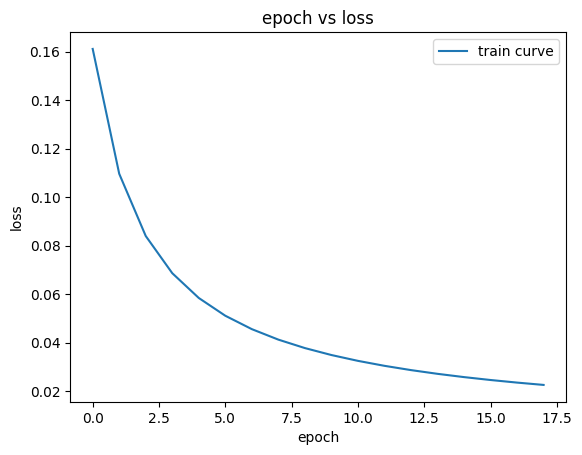

In [ ]:
'''Plotting graph for epoch vs loss for train and test data by calling "custom_train" function'''
w,b,train_loss,epochs = custom_train(train_vectors_stand, train_category.values, 0.0001, 0.0001, 0.001)
plt.plot(range(epochs), train_loss, label='train curve')
plt.title('epoch vs loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 8. Custom function to make predictions using logistic regression model

In [ ]:
def predict(w,b, X):
    '''function to predict label given weights, bias and standardized data'''
    predictions = []
    threshold = 0.5
    
    # Iterating each point of X
    for point in X:
        # Predicting each point by calling "custom_sigmoid" function 
        preds = custom_sigmoid(np.dot(w,point.T) + b)
        
        # Checking whether the prediction is greater than or less than the threshold 
        if  preds < threshold:
            # Appending prediction array with "0" if the prediction is less than the threshold
            predictions = np.append(predictions,0)
        else:
            # Assigning prediction array with "1" if the prediction is greater than the threshold
            predictions = np.append(predictions,1)

    #print(predictions)
    return predictions # Numpy array

### Grader Function - 5

In [ ]:
def grader_predict():
  ''' grader to check the test accuracy'''
  w, b, _, _ = custom_train(train_vectors_stand, train_category.values, 0.0001, 0.0001, 0.001)
  test_preds= predict(w, b, test_vectors_stand)
  test_accuracy= (np.sum(test_category==test_preds) / len(test_preds)) * 100
  if(test_accuracy >= 90):
    print("Success!")
  else:
    print("Failed! \n Test accuracy = ", test_accuracy)
  return
  
grader_predict()

Success!
